<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW2_GD_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (base)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание: min{10, ваш балл}.

In [1]:
# Импорты
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from time import time

## Задание 1 (0.5 балла)



Найдите экстремумы следующих функций (вручную, где возможно) и укажите их тип (максимум, минимум):

a) $f(x) = x^2 - 30x + 1$

b) $g(x) = -x^3 + 5x - 7x^2 + 17$

c) $h(x) = x^2 - 1/x$

d) $j(x) = 1/x^5 + x^{17} + 8$

`а)` Первая производная: f'(x) = 2x - 30. Приравниваем к нулю: 2x - 30 = 0 -> x = 15. Вторая производная: f''(x) = 2, так как f''(x)>0 -> при x=15 - **локальный минимум**, f(15) = -224

Вторая производная не равна нулю, следовательно **точек перегиба нет**

`b)` Первая производная: g'(x) = -3 * $x^2$ - 14x + 5. Приравниваем к нулю: -3 * $x^2$ - 14x + 5 = 0. Решаем уравнение: x = (-14 ± √$14^2$-4 * 3 * (-5))/6 = (-14 ± 16)/6. Получаем два корня: x1 = 1/3, x2 = -5

Вторая производная: g''(x) = -6x - 14, для x1: g''(1/3)-6/3 - 14 = -16 < 0 -> при x=1/3 - **локальный максимум**, для x2: g''(-5) = -6(-5)-14 = 16 > 0 -> при x=-5 - **локальный минимум**

Значения функции в экстремумах : g(1/3) = $-(1/3)^3$ - 7 * $(1/3)^2$ - 5(1/3) + 17 = -1/27 - 7(1/9) + 5/3 + 17 ~ 17.85; g(-5) = $-(-5)^3$ - 7 * $(-5)^2$ - 5(-5) = 125−175−25+17= −58

Точка перегиба: g''(x) =  0 -> -6x -14 = 0 -> x = -7/3 - **точка перегиба** 

`c)` Первая производная: h'(x) = 2x + 1/$(x)^2$. Приравниваем к нулю: 2x + 1/$(x)^2$ = 0 -> 2* $(x)^3$ + 1 = 0 -> x = (1/2)^1/3

Вторая производная: h''(x) = 2 - 2/$(x)^3$. При x = (1/2)^1/3 -> h''(x) = 2 - 2(-2) = 6 > 0 - **локальный минимум**

Значения функции в экстремуме: h((1/2)^1/3) ~ 1.89

Точка перегиба: h''(x) =  0 -> 2 - 2/$(x)^3$ = 0 -> $(x)^3$ = 1 -> x = 1 - **точка перегиба** 

`d)` Первая производная: j'(x) = -5/$(x)^6$ + 17 * x^16. Приравниваем к нулю: -5/$(x)^6$ + 17 * x^16 = 0, тут воспользуемся sympy и получим, что x1=-17**(21/22)*5**(1/22)/17, x2=17**(21/22)*5**(1/22)/17

Вторая производная: j''(x) = 30*x^(-7) + 272*x^15, в точке x1 - **локальный минимум**, в точке x2 - **локальный максимум**

Значения функции в экстремуме: j(x1) ~ 6.29, j(x2) ~ 9.7

Точка перегиба: j''(x) =  0 -> 272*x^15 + 30*x^(-7) = 0 -> 272*x^12 = -30 -> невозможно для действительных x, значит **точек перегиба нет**




## Задание 2 (1 балл)

Найдите экстремумы этих функций в Python.

In [2]:
# Определение икса
x = sp.Symbol('x', real=True)

# Определение функций
f = x**2 - 30*x + 1
g = -x**3 + 5*x - 7*x**2 + 17
h = x**2 - 1/x
j = 1/x**5 + x**17 + 8

funcs = [f, g, h, j]
names = ['f(x)', 'g(x)', 'h(x)', 'j(x)']

# Первый и второй дифференциалы
def derivative(expr):
    df_x = sp.diff(expr, x)
    dff_xx= sp.diff(df_x, x)
    return df_x, dff_xx

f1, f2 = derivative(f)
g1, g2 = derivative(g)
h1, h2 = derivative(h)
j1, j2 = derivative(j)

derivs = [(f1, f2), (g1, g2), (h1, h2), (j1, j2)]

In [3]:
for n, d in zip(names, derivs):
    print(f"Для функции {n} первая и вторая производные равны: {d}")

Для функции f(x) первая и вторая производные равны: (2*x - 30, 2)
Для функции g(x) первая и вторая производные равны: (-3*x**2 - 14*x + 5, -6*x - 14)
Для функции h(x) первая и вторая производные равны: (2*x + x**(-2), 2 - 2/x**3)
Для функции j(x) первая и вторая производные равны: (17*x**16 - 5/x**6, 272*x**15 + 30/x**7)


In [4]:
extrema_points = []

for (func, (d1, d2)), name in zip(zip(funcs, derivs), names):
    critical_points = sp.solve(sp.Eq(d1,0), x)
    # Определяем тип экстремума
    for cp in critical_points:
        second_val = d2.subs(x, cp)
        if second_val > 0:
            tp = "min"
        else:
            tp = "max"
        extrema_points.append((name, cp, func.subs(x, cp), tp))

for item in extrema_points:
    print(f"Функция {item[0]} имеет экстремум в точке x = {item[1]}: тип = {item[3]}, значение {item[0]} = {item[2]}")

Функция f(x) имеет экстремум в точке x = 15: тип = min, значение f(x) = -224
Функция g(x) имеет экстремум в точке x = -5: тип = min, значение g(x) = -58
Функция g(x) имеет экстремум в точке x = 1/3: тип = max, значение g(x) = 482/27
Функция h(x) имеет экстремум в точке x = -2**(2/3)/2: тип = min, значение h(x) = 3*2**(1/3)/2
Функция j(x) имеет экстремум в точке x = -17**(21/22)*5**(1/22)/17: тип = max, значение j(x) = -22*17**(5/22)*5**(17/22)/85 + 8
Функция j(x) имеет экстремум в точке x = 17**(21/22)*5**(1/22)/17: тип = min, значение j(x) = 22*17**(5/22)*5**(17/22)/85 + 8


## Задание 3 (1 балл)

Найдите точки перегиба функций из задания 1 (вручную, где возможно).

`Решение в задании 1`

## Задание 4 (1 балла)

Найдите точки перегиба этих функций в Python.

In [5]:
infl_points = []
for (func, (d1, d2)), name in zip(zip(funcs, derivs), names):
    ips = sp.solve(sp.Eq(d2,0), x)
    for ip in ips:
        infl_points.append((name, ip, func.subs(x, ip)))
for item in infl_points:
    print(f"Функция {item[0]} имеет точку перегиба в x={item[1]}, f(x)={item[2]}")

Функция g(x) имеет точку перегиба в x=-7/3, f(x)=-542/27
Функция h(x) имеет точку перегиба в x=1, f(x)=0


Остальные функции не имеют точек перегиба

### Внимание! Далее все задания необходимо выполнять для ВСЕХ функций из задания 1!

## Задание 5 (1 балл)

Постройте графики функций из задания 1 в Python (не забудьте подписать оси и сами графики):
*   изобразите графики с подписанными осями
*   отметьте одним цветом локальные экстремумы
*   отметьте другим цветом точки перегиба
*   подпишите на оси x значения экстремумов и точек перегиба

P.S. Для того, чтобы отметить точку на графике, вам понадобится функция (plt.scatter), а для того, чтобы подписать её значение на оси (plt.annotate).

Пример хорошего графика:

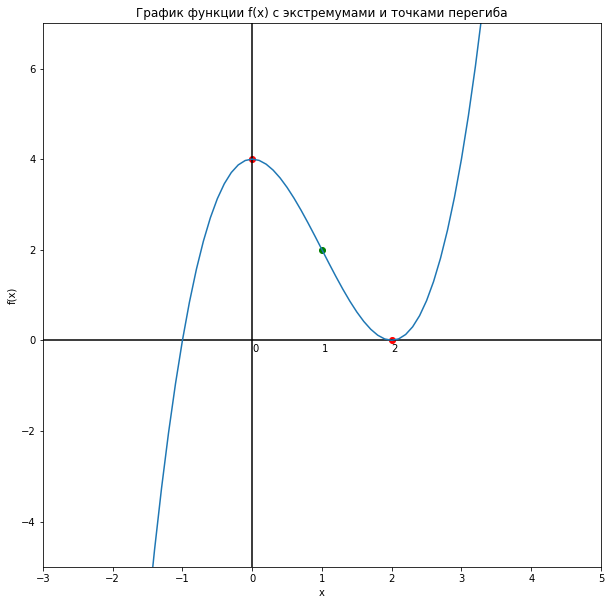

In [6]:
# Преобразуем списки экстремумов и точек перегиба в удобный формат
ext_dict = {n: [] for n in names}
inf_dict = {n: [] for n in names}

for n, i, k, v in extrema_points:
    ext_dict[n].append((i))

for n, i, k in infl_points:
    inf_dict[n].append((i))

display(ext_dict)
display(inf_dict)

{'f(x)': [15],
 'g(x)': [-5, 1/3],
 'h(x)': [-2**(2/3)/2],
 'j(x)': [-17**(21/22)*5**(1/22)/17, 17**(21/22)*5**(1/22)/17]}

{'f(x)': [], 'g(x)': [-7/3], 'h(x)': [1], 'j(x)': []}

In [7]:
# Визуализация экстремумов и точек перегиба функции
def plot_function(fx, name, extrema_points, inflection_points, x_vals, y_lim=200):

    # Преобразование функции в численную
    f_lambda = sp.lambdify(x, fx, 'numpy')
    y_vals = f_lambda(x_vals)

    # Построение графика функции
    plt.figure(figsize=(6,4))
    y_vals = f_lambda(x_vals)
    plt.plot(x_vals, y_vals)
    
    # Экстремумы
    if len(ext_dict[name]) > 0:
        for extr in extrema_points:
            plt.scatter([extr],[f_lambda(extr)], color='red')
            plt.annotate(f"{extr:.2f}", (extr, f_lambda(extr)), xytext=(extr+0.25, f_lambda(extr)+5))

    # Точки перегиба
    if len(inf_dict[name]) > 0:
        for inf in inflection_points:
            plt.scatter([inf],[f_lambda(inf)], color='green')
            plt.annotate(f"{inf:.2f}", (inf, f_lambda(inf)), xytext=(inf+0.25, f_lambda(inf)+5))

    # Общие настройки графика
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"График функции {name}", fontsize=14)
    plt.grid(True)
    plt.ylim(-y_lim, y_lim)
    plt.axvline(x=0, c = 'black')
    plt.axhline(y=0, c = 'black')
    plt.show()

In [8]:
# учитываем, что функции h и j имеют разрыв при x=0
# также учитываем, что plt.plot строит "линейный" график, объединяя все точки линий (актуально для h(x))
x_hj = np.linspace(-2, -0.1).tolist() + np.linspace(0.1, 2).tolist()
x_hj = np.array(x_hj)

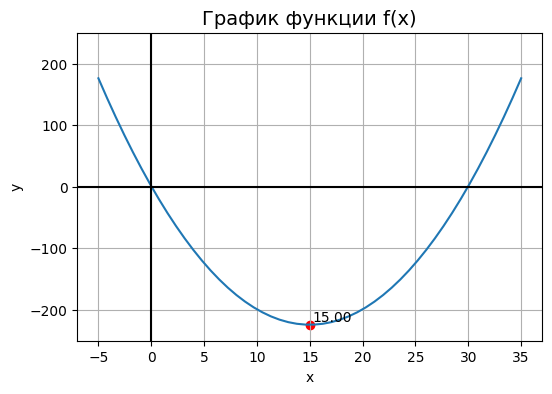

None


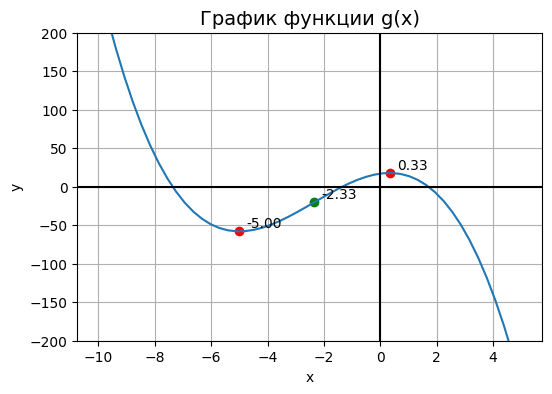

None


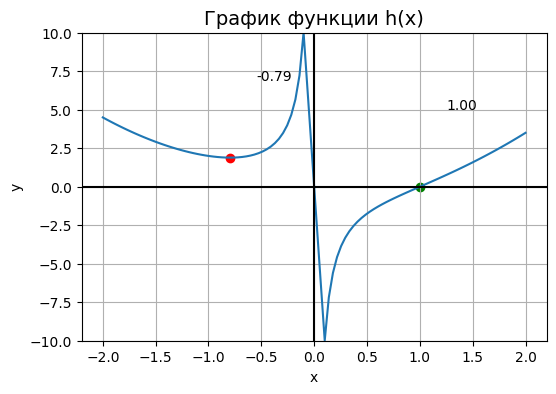

None


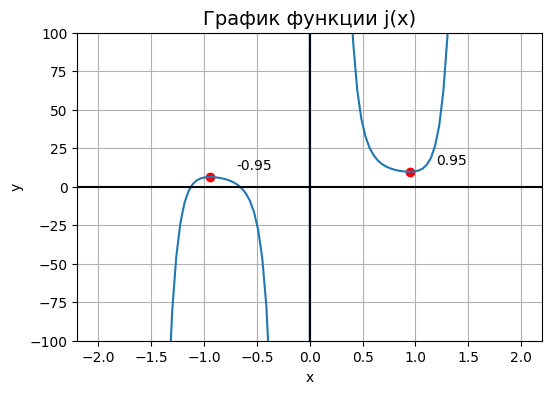

None


In [9]:
# Построение графиков
x_vals_lst = [np.linspace(-5, 35), np.linspace(-10, 5), x_hj, x_hj]
y_lims = [250, 200, 10, 100]

for func, name, x_vals, y_lim in zip(funcs, names, x_vals_lst, y_lims):
    print(plot_function(func, name, [x for x in ext_dict[name]], [x for x in inf_dict[name]], x_vals = x_vals, y_lim=y_lim))

## Задание 6 (1 балл)

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара: добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции).

In [10]:
# Градиентный спуск с модификацией дельта
def gradient_descent(fx, x0, lr=0.01, epsilon=1e-6, max_iter=1000, delta=1e-6):
    x_curr = x0
    df_x = sp.diff(fx, x)

    for i in range(max_iter):
      grad = df_x.subs(x, x_curr)
      if abs(grad) < delta:
        break
      x_curr = x_curr - lr * grad
      
      if abs(grad) < epsilon:
        break

    return x_curr, i

In [11]:
gradient_descent(f, 3, 0.01, 0.001)

(14.9995175579347, 500)

`Всё работает`

## Задание 7 (1 балл)

Подберите начальное приближение (сделайте несколько запусков из случайной начальной точки) и шаг градиентного спуска таким образом, чтобы процедура выдавала правильное значение наименьшего локального минимума функций (если он есть):
- [ ] в качестве результата выведите на экран значение начального приближения ($x_0$), `learning_rate`
- [ ] нарисуйте график функции и изобразите на нём наименьший из найденных локальных минимумов; на оси $x$ подпишите значение этого минимума. \
(Постарайтесь сделать реализацию графика в виде функции, чтобы оптимизировать процесс. Потом функция понадобится вам в задании 9, но это не обязательное требование).
- [ ] если такой точки у функции нет, поясните это текстом при помощи Markdown

In [12]:
# Функция для подбора начального приближения x0 и learning_rate
def initial_approx(fx, name, x0_lst, lr_lst=[0.1, 0.01, 0.001], delta=1e-5):
    mins_lst = []
    
    # Находим оптимальные значения
    for x0_test in x0_lst:
        for lr_test in lr_lst:
            x_min = gradient_descent(fx, x0_test, lr=lr_test, max_iter=1000, delta=delta)[0]
            # Проверим насколько близко к известному минимуму
            if abs(x_min-min(ext_dict[name]))<delta:
                mins_lst.append(x_min)
                print(f"Минимум найден для {name} при начальном приближении x0={x0_test}, lr={lr_test}")

    if len(mins_lst)>0:
        return(min(mins_lst))
    else:
        return('Минимум не был найден')

In [13]:
# список для нужного масштаба
x0_lst_ = [[0, 10, 20], [-2, -1, -0.5], [-2, -1.5, -0.5], [0.8, 1, 1.2]]
# список значений минимумов функций
mins_lst_ = []

for func, name, x0_ in zip(funcs, names, x0_lst_):
    min_ = initial_approx(func, name, x0_)
    mins_lst_.append(min_)

Минимум найден для f(x) при начальном приближении x0=0, lr=0.1
Минимум найден для f(x) при начальном приближении x0=0, lr=0.01
Минимум найден для f(x) при начальном приближении x0=10, lr=0.1
Минимум найден для f(x) при начальном приближении x0=10, lr=0.01
Минимум найден для f(x) при начальном приближении x0=20, lr=0.1
Минимум найден для f(x) при начальном приближении x0=20, lr=0.01
Минимум найден для g(x) при начальном приближении x0=-2, lr=0.1
Минимум найден для g(x) при начальном приближении x0=-2, lr=0.01
Минимум найден для g(x) при начальном приближении x0=-2, lr=0.001
Минимум найден для g(x) при начальном приближении x0=-1, lr=0.1
Минимум найден для g(x) при начальном приближении x0=-1, lr=0.01
Минимум найден для g(x) при начальном приближении x0=-1, lr=0.001
Минимум найден для g(x) при начальном приближении x0=-0.5, lr=0.1
Минимум найден для g(x) при начальном приближении x0=-0.5, lr=0.01
Минимум найден для g(x) при начальном приближении x0=-0.5, lr=0.001
Минимум найден для h(x) 

In [14]:
mins_lst_

[14.9999950156816,
 -5.00000053833405,
 -0.793702137326593,
 'Минимум не был найден']

С помощью начального приближения найдены минимумы для всех функций, кроме j(x), она сильно нелинейная, что усложняет сходимость градиентного спуска

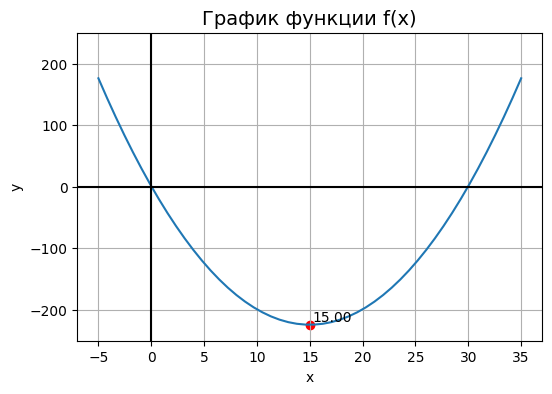

None


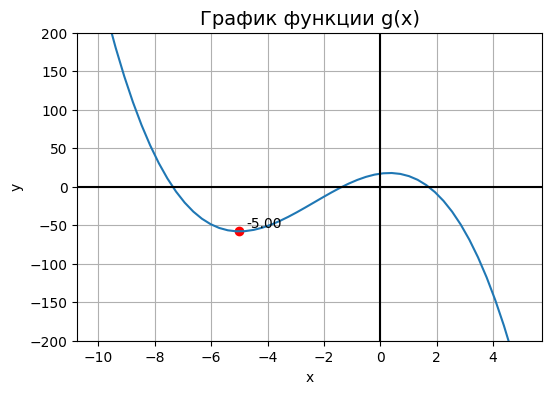

None


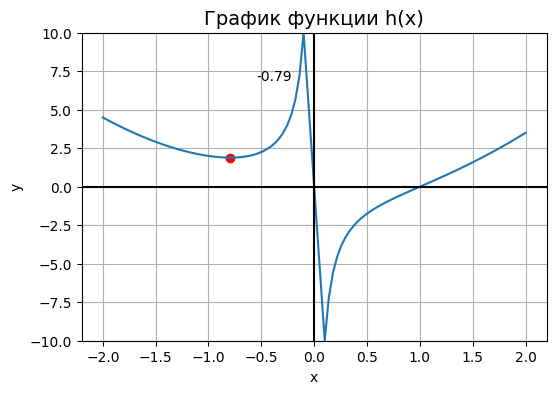

None


In [15]:
# Графики
for func, name, x_vals, y_lim, min_ in zip(funcs[:3], names[:3], x_vals_lst[:3], y_lims[:3], mins_lst_[:3]):
    print(plot_function(func, name, [min_], [], x_vals = x_vals, y_lim=y_lim))

## Задание 8 (1.5 балла)

Реализуйте [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Про метод ещё можно почитать [здесь](https://math.semestr.ru/optim/minimum.php).

In [16]:
# Метод Ньютона
def newton(fx, name,  x0, delta=1e-3, max_iter=1000):
    # Первая и вторая производная от функции `fx`
    df = sp.diff(fx,x)
    dff = sp.diff(df,x)

    # Преобразование производных в функции для численного вычисления
    f_ = sp.lambdify(x, df, 'numpy')
    f__= sp.lambdify(x, dff, 'numpy')
    curr_x = x0

    for i in range(max_iter):
        grad = f_(curr_x) # градиент
        hess = f__(curr_x) # гессиан

        # чтобы избежать деления на ноль
        if abs(hess)<1e-14: 
            break
        next_x = curr_x - grad/hess

        # условие остановки по разности между текущим и новым значением
        if abs(next_x - curr_x)<delta:
            curr_x = next_x
            break

        # Обновление значения текущей точки
        curr_x = next_x
    
    print(f"Минимум найден для {name} при x0={x0}, iter={i}")

    return curr_x, i

## Задание 9 (0.5 балла)

Примените метод Ньютона для поиска минимума указанных функций (в ответе выведите подходящее значение начальной точки, график с найденным и подписанным значением минимума, как в задании 7).

In [17]:
# Применение метода Ньютона
x0_lst = [10, -10, -1.5, 0.8]
mins_new = []
for n_,f_, x0_ in zip(names, funcs, x0_lst):
    min_ = newton(f_, n_, x0_)[0]
    mins_new.append(min_)
    print('Значение минимума:', min_)

Минимум найден для f(x) при x0=10, iter=1
Значение минимума: 15.0
Минимум найден для g(x) при x0=-10, iter=4
Значение минимума: -5.000000000434855
Минимум найден для h(x) при x0=-1.5, iter=4
Значение минимума: -0.793700309441622
Минимум найден для j(x) при x0=0.8, iter=3
Значение минимума: 0.9458926897180892


`Метод смог найти все экстремумы функций`

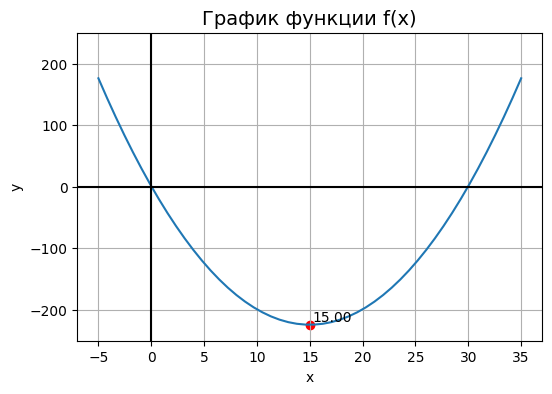

None


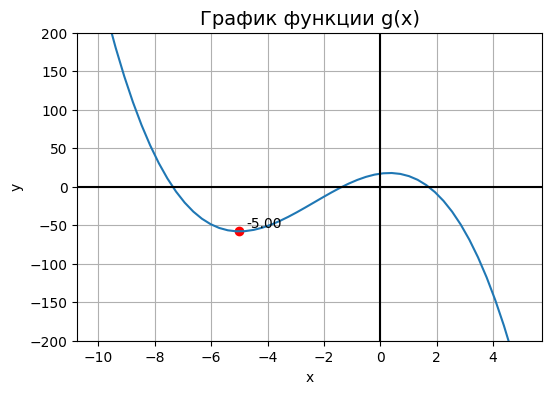

None


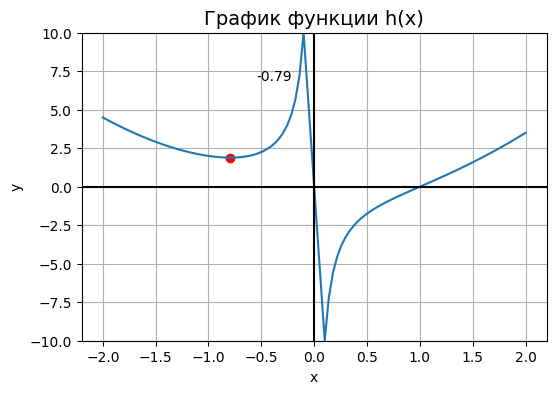

None


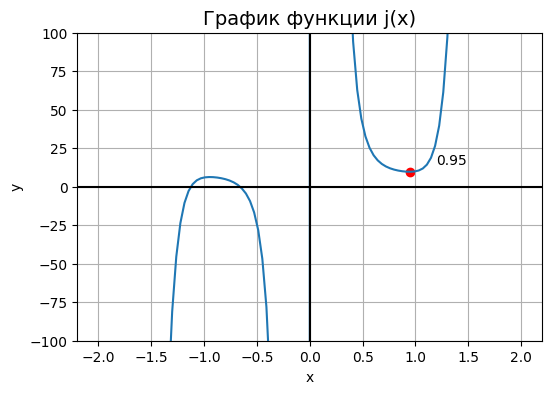

None


In [18]:
# Графики
for func, name, x_vals, x_min_, y_lim in zip(funcs, names, x_vals_lst, mins_new, y_lims):
    print(plot_function(func, name, [x_min_], [], x_vals = x_vals, y_lim=y_lim))

## Задание 10 (1 балл)

Сравните скорость работы градиентного спуска и метода Ньютона при одинаковой точности решения $|x_{found}-x_{true}|<10^{-5}$:
* за сколько итераций каждый метод сходится (в среднем по всем функциям для правильно подобранных значений гиперпараметров)? Какой быстрее?
* какой метод дает более точный результат при фиксированном числе итераций $N=10$? (для ответа на этот вопрос добавьте в процедуру градиентного спуска возможность останавливаться при достижении некоторого количества итераций $N$)

In [19]:
# Настоящие минимумы
true_mins = [15, -5, -2**(2/3)/2, -17**(21/22)*5**(1/22)/17]
delta_ = 1e-5

# Сравнение GD и Newton
for n_, f_, tr_min, x0_ in zip(names, funcs, true_mins, x0_lst):

    x_gd, i_gd = gradient_descent(f_, x0=x0_, lr=0.01, delta=1e-5, max_iter=10)
    error_gd = abs(x_gd - tr_min)

    x_nm, i_nm = newton(f_, n_, x0=x0_, delta=1e-5, max_iter=10)
    error_nm = abs(x_nm - tr_min)

    print(f"GD: итераций = {i_gd}, модуль ошибки = {round(error_gd, 3)}")
    print(f"Newton: итераций = {i_nm}, модуль ошибки = {round(error_nm, 3)}")


Минимум найден для f(x) при x0=10, iter=1
GD: итераций = 9, модуль ошибки = 4.085
Newton: итераций = 1, модуль ошибки = 0.0
Минимум найден для g(x) при x0=-10, iter=5
GD: итераций = 9, модуль ошибки = 0.434
Newton: итераций = 5, модуль ошибки = 0.0
Минимум найден для h(x) при x0=-1.5, iter=5
GD: итераций = 9, модуль ошибки = 0.480
Newton: итераций = 5, модуль ошибки = 0.0
Минимум найден для j(x) при x0=0.8, iter=4
GD: итераций = 9, модуль ошибки = 1.891
Newton: итераций = 4, модуль ошибки = 1.892


`Вывод:` 
* Метод Ньютона быстрее по числу итераций при подходящем начальном приближении
* Метод Ньютона обычно даёт более точный результат за меньшее число итераций

## **Бонусная часть**

## Задание 11 (1 балл)

Реализуйте оптимизацию метода градиентного спуска - Momentum. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [20]:
# Momentum
def momentum_grad(fx, x0, lr=0.01, gamma=0.8, delta=1e-6, max_iter=1000):
    # Первая производная
    df = sp.diff(fx, x)
    # Преобразование в функцию
    f_ = sp.lambdify(x, df, 'numpy')
    v = 0.0 # начальная скорость
    curr_x = x0

    for i in range(max_iter):
        grad = f_(curr_x) # градиент
        grad = np.clip(grad, -1e6, 1e6)  # Ограничение градиента для избежания ошибок
        v = gamma*v + lr*grad # обновление скорости
        next_x = curr_x - v # обновление значения переменной

        # Условие остановки по разности между текущим и новым значением
        if abs(next_x - curr_x)<delta:
            curr_x = next_x
            break
        
        # Обновление значения текущей точки
        curr_x = next_x

    return curr_x, i

## Задание 12 (0.5 балла)

Проверьте, решает ли Momentum GD проблему поиска начального приближения для функций из задания 1?

In [21]:
%%time
for name, func, x0__ in zip(names, funcs, x0_lst_):
    if name != 'j(x)':
        lr_ = 0.01
    else:
        lr_ = 0.001
    for x0_test in x0__:
        x_mom, i_mom = momentum_grad(func, x0_test, lr=lr_, gamma=0.8)
        print(f"Минимум найден для {name} при x0={x0_test}, x_min={x_mom}, iters={i_mom}")

Минимум найден для f(x) при x0=0, x_min=14.999988960125359, iters=123
Минимум найден для f(x) при x0=10, x_min=15.000128550330992, iters=94
Минимум найден для f(x) при x0=20, x_min=14.999871449669008, iters=94
Минимум найден для g(x) при x0=-2, x_min=-4.999986322913975, iters=108
Минимум найден для g(x) при x0=-1, x_min=-5.000006767125453, iters=117
Минимум найден для g(x) при x0=-0.5, x_min=-4.999983999081258, iters=111
Минимум найден для h(x) при x0=-2, x_min=-0.7937899061888344, iters=83
Минимум найден для h(x) при x0=-1.5, x_min=-0.7937616301004832, iters=82
Минимум найден для h(x) при x0=-0.5, x_min=-0.793651249416673, iters=78
Минимум найден для j(x) при x0=0.8, x_min=0.9458661451599588, iters=75
Минимум найден для j(x) при x0=1, x_min=0.945862416586655, iters=67
Минимум найден для j(x) при x0=1.2, x_min=0.9458661709733885, iters=89
CPU times: total: 15.6 ms
Wall time: 18 ms


`Вывод`
* Всё работает, все минимумы находятся при использовании Momentum GD и работает это быстрее обычного GD

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/12WN7wg)

`Пусть это будет кот Янины)`